<a href="https://colab.research.google.com/github/yleessam/2501_dl_env_colab/blob/main/5_%EC%98%81%ED%99%94%EB%A6%AC%EB%B7%B0%EB%B6%84%EB%A5%98.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
from tensorflow.keras.datasets import imdb

((train_data, train_labels), (test_data, test_labels)) = imdb.load_data(num_words = 10000)
train_data.shape, test_data.shape

17464789/17464789 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


((25000,), (25000,))

In [5]:
len(train_data[0])

218

In [6]:
train_data[0]

[1,
 14,
 22,
 16,
 43,
 530,
 973,
 1622,
 1385,
 65,
 458,
 4468,
 66,
 3941,
 4,
 173,
 36,
 256,
 5,
 25,
 100,
 43,
 838,
 112,
 50,
 670,
 2,
 9,
 35,
 480,
 284,
 5,
 150,
 4,
 172,
 112,
 167,
 2,
 336,
 385,
 39,
 4,
 172,
 4536,
 1111,
 17,
 546,
 38,
 13,
 447,
 4,
 192,
 50,
 16,
 6,
 147,
 2025,
 19,
 14,
 22,
 4,
 1920,
 4613,
 469,
 4,
 22,
 71,
 87,
 12,
 16,
 43,
 530,
 38,
 76,
 15,
 13,
 1247,
 4,
 22,
 17,
 515,
 17,
 12,
 16,
 626,
 18,
 2,
 5,
 62,
 386,
 12,
 8,
 316,
 8,
 106,
 5,
 4,
 2223,
 5244,
 16,
 480,
 66,
 3785,
 33,
 4,
 130,
 12,
 16,
 38,
 619,
 5,
 25,
 124,
 51,
 36,
 135,
 48,
 25,
 1415,
 33,
 6,
 22,
 12,
 215,
 28,
 77,
 52,
 5,
 14,
 407,
 16,
 82,
 2,
 8,
 4,
 107,
 117,
 5952,
 15,
 256,
 4,
 2,
 7,
 3766,
 5,
 723,
 36,
 71,
 43,
 530,
 476,
 26,
 400,
 317,
 46,
 7,
 4,
 2,
 1029,
 13,
 104,
 88,
 4,
 381,
 15,
 297,
 98,
 32,
 2071,
 56,
 26,
 141,
 6,
 194,
 7486,
 18,
 4,
 226,
 22,
 21,
 134,
 476,
 26,
 480,
 5,
 144,
 30,
 5535,
 18,

In [7]:
train_labels[0]  #긍정 1, 부정 0 > 이진분류

1

In [8]:
max([ max(sequence) for sequence in train_data])

9999

In [10]:
word_index = imdb.get_word_index()

reverse_word_index = dict(
    [(value, key) for (key, value) in word_index.items()]
)

decoded_review = " ".join( [ reverse_word_index.get(i, "?") for i in train_data[0]])
decoded_review

"the as you with out themselves powerful lets loves their becomes reaching had journalist of lot from anyone to have after out atmosphere never more room and it so heart shows to years of every never going and help moments or of every chest visual movie except her was several of enough more with is now current film as you of mine potentially unfortunately of you than him that with out themselves her get for was camp of you movie sometimes movie that with scary but and to story wonderful that in seeing in character to of 70s musicians with heart had shadows they of here that with her serious to have does when from why what have critics they is you that isn't one will very to as itself with other and in of seen over landed for anyone of and br show's to whether from than out themselves history he name half some br of and odd was two most of mean for 1 any an boat she he should is thought frog but of script you not while history he heart to real at barrel but when from one bit then have t

# 데이터 준비

In [13]:
#피처의 단어번호를 원핫인코딩 처리

import numpy as np

def vectorize_sequence( sequences, dimension=10000 ):
  results = np.zeros((len(sequences), dimension))
  for i, sequence in enumerate(sequences):
    for j in sequence:
      results[i,j] = 1.
  print(results[0], results[0].shape)
  return results

x_train = vectorize_sequence(train_data)
x_test = vectorize_sequence(test_data)


[0. 1. 1. ... 0. 0. 0.] (10000,)
[0. 1. 1. ... 0. 0. 0.] (10000,)


In [14]:
# labels
train_labels[:5]

array([1, 0, 0, 1, 0])

In [15]:
y_train = np.asarray(train_labels).astype('float32')
y_test = np.asarray(test_labels).astype('float32')

# 모델 구성

In [21]:
from tensorflow import keras
from tensorflow.keras import layers

model = keras.Sequential([
  layers.Dense(16, activation='relu'),
  layers.Dense(16, activation='relu'),
  layers.Dense(1, activation='sigmoid')
]#스칼라 0,1 사이의 확률
)
model

<Sequential name=sequential_1, built=False>

In [18]:
model.compile(
    optimizer='rmsprop',
    loss='binary_crossentropy',
    metrics=['accuracy']
)

In [22]:
# adam 비교해 보기
model.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=['accuracy']
)

# 훈련

In [19]:
x_val = x_train[:10000] #검증용
partial_x_train = x_train[10000:] #훈련용

y_val = y_train[:10000]
partial_y_train = y_train[10000:]


In [23]:
history = model.fit(partial_x_train, partial_y_train,
          epochs=20,
          batch_size=512,
          validation_data = (x_val, y_val)
          )

Epoch 1/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 4s 89ms/step - accuracy: 0.6836 - loss: 0.6173 - val_accuracy: 0.8595 - val_loss: 0.3914
Epoch 2/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 55ms/step - accuracy: 0.9018 - loss: 0.3169 - val_accuracy: 0.8839 - val_loss: 0.3010
Epoch 3/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 47ms/step - accuracy: 0.9318 - loss: 0.2114 - val_accuracy: 0.8874 - val_loss: 0.2830
Epoch 4/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 39ms/step - accuracy: 0.9554 - loss: 0.1511 - val_accuracy: 0.8875 - val_loss: 0.2819
Epoch 5/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - accuracy: 0.9662 - loss: 0.1194 - val_accuracy: 0.8846 - val_loss: 0.2943
Epoch 6/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 37ms/step - accuracy: 0.9751 - loss: 0.0932 - val_accuracy: 0.8803 - val_loss: 0.3155
Epoch 7/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 40ms/step - accuracy: 0.9860 - loss: 0.0712 - val_accuracy: 0.8780 - val_loss: 0.3347
Epoch 8/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 35ms/step - accuracy: 0.9905 - loss: 0.0570 - val_accuracy: 0.8773 - v

# 훈련 데이터 검증 > x_val, y_val

In [26]:
history.history.keys()

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])

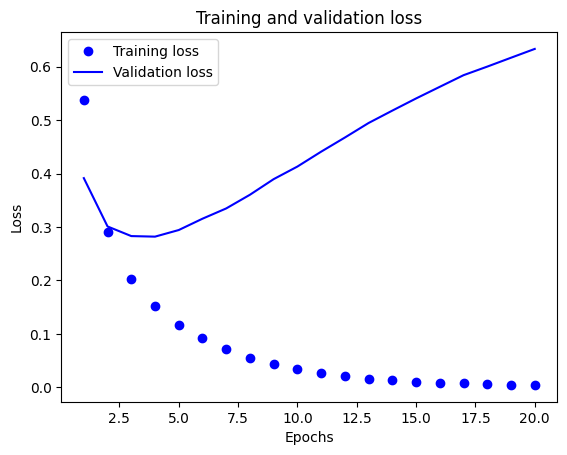

In [24]:
import matplotlib.pyplot as plt
history_dict = history.history
loss_values = history_dict["loss"]
val_loss_values = history_dict["val_loss"]
epochs = range(1, len(loss_values) + 1)
plt.plot(epochs, loss_values, "bo", label="Training loss")
plt.plot(epochs, val_loss_values, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

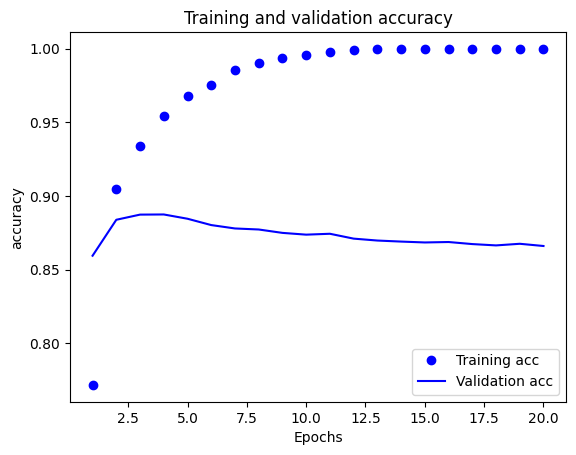

In [27]:
loss_values = history_dict["accuracy"]
val_loss_values = history_dict["val_accuracy"]
epochs = range(1, len(loss_values) + 1)
plt.plot(epochs, loss_values, "bo", label="Training acc")
plt.plot(epochs, val_loss_values, "b", label="Validation acc")
plt.title("Training and validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("accuracy")
plt.legend()
plt.show()

In [28]:
model

<Sequential name=sequential_1, built=True>

# 모델 구성 조정 > 검증데이터 수행

In [29]:
model_1 = keras.Sequential([
  layers.Dense(16, activation='relu'),
  layers.Dense(16, activation='relu'),
  layers.Dense(1, activation='sigmoid')
]#스칼라 0,1 사이의 확률
)
model_1

<Sequential name=sequential_2, built=False>

In [30]:
model_1.compile(
    optimizer='rmsprop',
    loss='binary_crossentropy',
    metrics=['accuracy']
)

In [38]:
history1 = model_1.fit(partial_x_train, partial_y_train,
          epochs=4,
          batch_size=512,
          validation_data = (x_val, y_val)
          )

Epoch 1/4
30/30 ━━━━━━━━━━━━━━━━━━━━ 4s 128ms/step - accuracy: 0.9635 - loss: 0.1103 - val_accuracy: 0.9476 - val_loss: 0.1487
Epoch 2/4
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 44ms/step - accuracy: 0.9699 - loss: 0.0960 - val_accuracy: 0.9402 - val_loss: 0.1610
Epoch 3/4
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 40ms/step - accuracy: 0.9793 - loss: 0.0797 - val_accuracy: 0.9368 - val_loss: 0.1719
Epoch 4/4
30/30 ━━━━━━━━━━━━━━━━━━━━ 4s 90ms/step - accuracy: 0.9830 - loss: 0.0675 - val_accuracy: 0.9170 - val_loss: 0.2142


In [41]:
# 모델 구성 재조정 - 전체 훈련 데이터로 수행
model_2 = keras.Sequential([
  layers.Dense(32, activation='relu'),
  layers.Dense(32, activation='relu'),
  layers.Dense(1, activation='sigmoid')
]#스칼라 0,1 사이의 확률
)
model_2.compile(
    optimizer='rmsprop',
    loss='binary_crossentropy',
    metrics=['accuracy']
)

In [43]:
history2 = model_2.fit(x_train, y_train,
          epochs=10,
          batch_size=512
          )


Epoch 1/10
49/49 ━━━━━━━━━━━━━━━━━━━━ 2s 47ms/step - accuracy: 0.9412 - loss: 0.1584
Epoch 2/10
49/49 ━━━━━━━━━━━━━━━━━━━━ 2s 33ms/step - accuracy: 0.9490 - loss: 0.1392
Epoch 3/10
49/49 ━━━━━━━━━━━━━━━━━━━━ 2s 33ms/step - accuracy: 0.9620 - loss: 0.1094
Epoch 4/10
49/49 ━━━━━━━━━━━━━━━━━━━━ 2s 33ms/step - accuracy: 0.9654 - loss: 0.0956
Epoch 5/10
49/49 ━━━━━━━━━━━━━━━━━━━━ 2s 33ms/step - accuracy: 0.9712 - loss: 0.0826
Epoch 6/10
49/49 ━━━━━━━━━━━━━━━━━━━━ 2s 32ms/step - accuracy: 0.9794 - loss: 0.0660
Epoch 7/10
49/49 ━━━━━━━━━━━━━━━━━━━━ 4s 52ms/step - accuracy: 0.9837 - loss: 0.0558
Epoch 8/10
49/49 ━━━━━━━━━━━━━━━━━━━━ 2s 35ms/step - accuracy: 0.9877 - loss: 0.0453
Epoch 9/10
49/49 ━━━━━━━━━━━━━━━━━━━━ 2s 34ms/step - accuracy: 0.9907 - loss: 0.0375
Epoch 10/10
49/49 ━━━━━━━━━━━━━━━━━━━━ 3s 33ms/step - accuracy: 0.9891 - loss: 0.0392


# 새로운 데이터로 평가

In [36]:
model_2.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_12 (Dense)                     │ (None, 16)                  │         160,016 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_13 (Dense)                     │ (None, 16)                  │             272 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_14 (Dense)                     │ (None, 1)                   │              17 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 320,612 (1.22 MB)

 Trainable params: 160,305 (626.19 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 160,307 (626.20 KB)

In [35]:
model_2.predict(x_test)

782/782 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step


array([[0.1544946 ],
       [0.999638  ],
       [0.44526958],
       ...,
       [0.06644309],
       [0.05917973],
       [0.5102358 ]], dtype=float32)

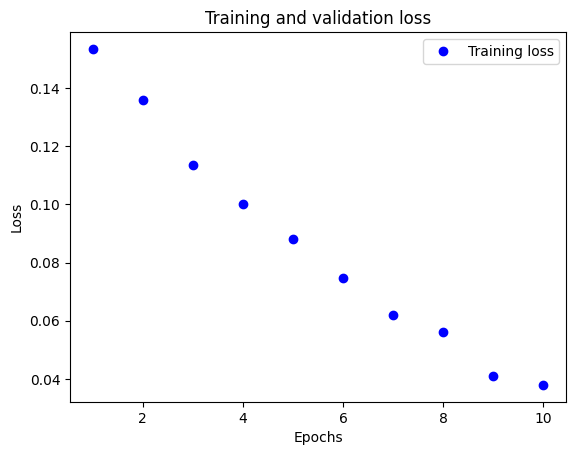

In [45]:
import matplotlib.pyplot as plt
history_dict = history2.history
loss_values = history_dict["loss"]
#val_loss_values = history_dict["val_loss"]
epochs = range(1, len(loss_values) + 1)
plt.plot(epochs, loss_values, "bo", label="Training loss")
#plt.plot(epochs, val_loss_values, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

In [46]:
# 모델 구성 재조정 - 전체 훈련 데이터로 수행
model_3 = keras.Sequential([
  layers.Dense(32, activation='relu'),
  layers.Dense(32, activation='relu'),
  layers.Dense(1, activation='sigmoid')
]#스칼라 0,1 사이의 확률
)
model_3.compile(
    optimizer='rmsprop',
    loss='binary_crossentropy',
    metrics=['accuracy'],
)
history3 = model_3.fit(x_train, y_train,
          epochs=20,
          batch_size=512, validation_split=0.4
          )


Epoch 1/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 3s 79ms/step - accuracy: 0.7079 - loss: 0.5845 - val_accuracy: 0.8515 - val_loss: 0.3805
Epoch 2/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 3s 86ms/step - accuracy: 0.8820 - loss: 0.3244 - val_accuracy: 0.8826 - val_loss: 0.2984
Epoch 3/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 4s 46ms/step - accuracy: 0.9240 - loss: 0.2252 - val_accuracy: 0.8873 - val_loss: 0.2814
Epoch 4/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 45ms/step - accuracy: 0.9402 - loss: 0.1818 - val_accuracy: 0.8880 - val_loss: 0.2791
Epoch 5/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 43ms/step - accuracy: 0.9486 - loss: 0.1480 - val_accuracy: 0.8871 - val_loss: 0.2847
Epoch 6/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 3s 46ms/step - accuracy: 0.9597 - loss: 0.1216 - val_accuracy: 0.8804 - val_loss: 0.3133
Epoch 7/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 54ms/step - accuracy: 0.9688 - loss: 0.1024 - val_accuracy: 0.8797 - val_loss: 0.3349
Epoch 8/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 72ms/step - accuracy: 0.9724 - loss: 0.0946 - val_accuracy: 0.8804 - v

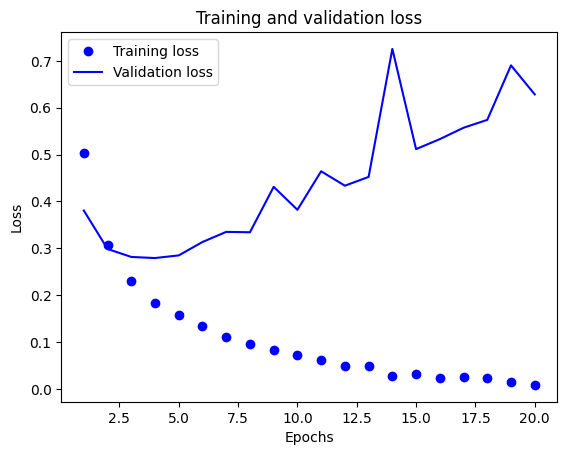

In [48]:
import matplotlib.pyplot as plt
history_dict = history3.history
loss_values = history_dict["loss"]
val_loss_values = history_dict["val_loss"]
epochs = range(1, len(loss_values) + 1)
plt.plot(epochs, loss_values, "bo", label="Training loss")
plt.plot(epochs, val_loss_values, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

In [53]:
# 모델 구성 재조정 - 전체 훈련 데이터로 수행
model_4 = keras.Sequential([
  layers.Dense(4, activation='relu'),
  layers.Dense(4, activation='relu'),
  layers.Dense(1, activation='sigmoid')
]#스칼라 0,1 사이의 확률
)
model_4.compile(
    optimizer='rmsprop',
    loss='binary_crossentropy',
    metrics=['accuracy'],
)
history4 = model_4.fit(x_train, y_train,
          epochs=10,
          batch_size=512, validation_split=0.4
          )


Epoch 1/10
30/30 ━━━━━━━━━━━━━━━━━━━━ 3s 74ms/step - accuracy: 0.6429 - loss: 0.6518 - val_accuracy: 0.8439 - val_loss: 0.5362
Epoch 2/10
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 47ms/step - accuracy: 0.8629 - loss: 0.4939 - val_accuracy: 0.8663 - val_loss: 0.4395
Epoch 3/10
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 39ms/step - accuracy: 0.8945 - loss: 0.3931 - val_accuracy: 0.8798 - val_loss: 0.3721
Epoch 4/10
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - accuracy: 0.9110 - loss: 0.3179 - val_accuracy: 0.8840 - val_loss: 0.3308
Epoch 5/10
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 35ms/step - accuracy: 0.9213 - loss: 0.2683 - val_accuracy: 0.8853 - val_loss: 0.3060
Epoch 6/10
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - accuracy: 0.9339 - loss: 0.2326 - val_accuracy: 0.8874 - val_loss: 0.2932
Epoch 7/10
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 31ms/step - accuracy: 0.9406 - loss: 0.2012 - val_accuracy: 0.8915 - val_loss: 0.2798
Epoch 8/10
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - accuracy: 0.9438 - loss: 0.1841 - val_accuracy: 0.8912 - v

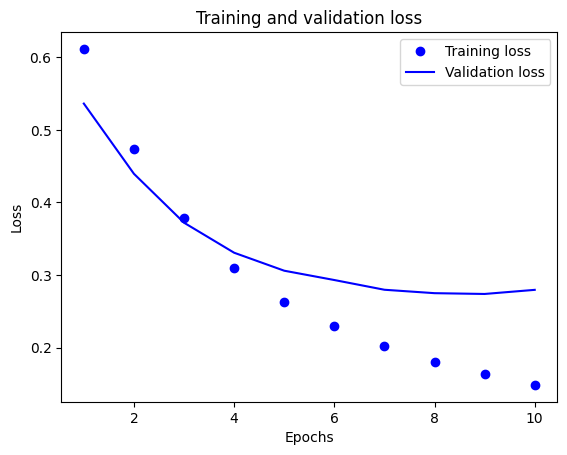

In [54]:
import matplotlib.pyplot as plt
history_dict = history3.history
loss_values = history_dict["loss"]
val_loss_values = history_dict["val_loss"]
epochs = range(1, len(loss_values) + 1)
plt.plot(epochs, loss_values, "bo", label="Training loss")
plt.plot(epochs, val_loss_values, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

In [56]:
from tensorflow.keras import regularizers
# 모델 구성 재조정 - 매개변수 규제 적용
model_5 = keras.Sequential([
  layers.Dense(4, kernel_regularizer = regularizers.l2(0.002), activation='relu'),
  layers.Dense(4, kernel_regularizer = regularizers.l2(0.002), activation='relu'),
  layers.Dense(1, activation='sigmoid')
]#스칼라 0,1 사이의 확률
)
model_5.compile(
    optimizer='rmsprop',
    loss='binary_crossentropy',
    metrics=['accuracy'],
)
history5 = model_5.fit(x_train, y_train,
          epochs=20,
          batch_size=512, validation_split=0.4
          )


Epoch 1/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 3s 58ms/step - accuracy: 0.5596 - loss: 0.6870 - val_accuracy: 0.6924 - val_loss: 0.5998
Epoch 2/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 37ms/step - accuracy: 0.7613 - loss: 0.5765 - val_accuracy: 0.8438 - val_loss: 0.5511
Epoch 3/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 43ms/step - accuracy: 0.8463 - loss: 0.5250 - val_accuracy: 0.8466 - val_loss: 0.5163
Epoch 4/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 3s 48ms/step - accuracy: 0.8819 - loss: 0.4885 - val_accuracy: 0.8678 - val_loss: 0.4932
Epoch 5/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 32ms/step - accuracy: 0.8982 - loss: 0.4615 - val_accuracy: 0.8807 - val_loss: 0.4759
Epoch 6/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - accuracy: 0.9159 - loss: 0.4364 - val_accuracy: 0.8842 - val_loss: 0.4617
Epoch 7/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - accuracy: 0.9293 - loss: 0.4098 - val_accuracy: 0.8623 - val_loss: 0.4570
Epoch 8/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - accuracy: 0.9336 - loss: 0.3928 - val_accuracy: 0.8601 - v

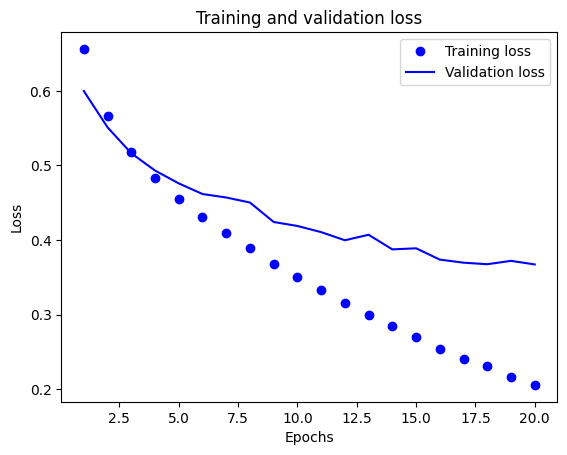

In [57]:
import matplotlib.pyplot as plt
history_dict = history5.history
loss_values = history_dict["loss"]
val_loss_values = history_dict["val_loss"]
epochs = range(1, len(loss_values) + 1)
plt.plot(epochs, loss_values, "bo", label="Training loss")
plt.plot(epochs, val_loss_values, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

In [60]:
# 모델 구성 재조정 - 드롭아웃 적용
model_6 = keras.Sequential([
  layers.Dense(16, activation='relu'),
  layers.Dropout(0.5),
  layers.Dense(16, activation='relu'),
  layers.Dropout(0.5),
  layers.Dense(1, activation='sigmoid')
]#스칼라 0,1 사이의 확률
)
model_6.compile(
    optimizer='rmsprop',
    loss='binary_crossentropy',
    metrics=['accuracy'],
)
history6 = model_6.fit(x_train, y_train,
          epochs=5,
          batch_size=512, validation_split=0.4
          )


Epoch 1/5
30/30 ━━━━━━━━━━━━━━━━━━━━ 8s 156ms/step - accuracy: 0.5712 - loss: 0.6713 - val_accuracy: 0.8409 - val_loss: 0.5653
Epoch 2/5
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 38ms/step - accuracy: 0.7418 - loss: 0.5583 - val_accuracy: 0.8676 - val_loss: 0.4584
Epoch 3/5
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 42ms/step - accuracy: 0.8118 - loss: 0.4690 - val_accuracy: 0.8779 - val_loss: 0.3820
Epoch 4/5
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 40ms/step - accuracy: 0.8440 - loss: 0.4025 - val_accuracy: 0.8831 - val_loss: 0.3359
Epoch 5/5
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 45ms/step - accuracy: 0.8735 - loss: 0.3535 - val_accuracy: 0.8863 - val_loss: 0.3066


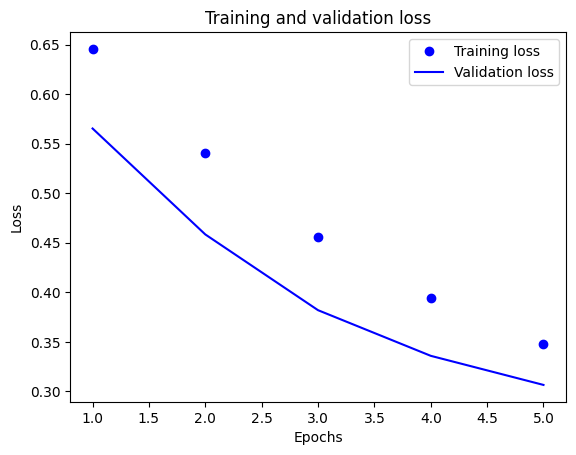

In [61]:
import matplotlib.pyplot as plt
history_dict = history6.history
loss_values = history_dict["loss"]
val_loss_values = history_dict["val_loss"]
epochs = range(1, len(loss_values) + 1)
plt.plot(epochs, loss_values, "bo", label="Training loss")
plt.plot(epochs, val_loss_values, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()